Celda 1: Importar Librerías

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Celda 2: Cargar Datos

In [66]:
# Cargar los datos desde el CSV
data_path = "/Users/alexandersandoval/Documents/GitHub/TableauProjects/proyecto-histograma-bins/data/raw/crypto_data.csv"
df = pd.read_csv(data_path)

# Mostrar las primeras filas del DataFrame
df.head()


,timestamp,price
0,2024-07-20 04:09:45.771,66566.629143
1,2024-07-20 05:09:45.385,66642.592330
2,2024-07-20 06:07:55.479,66568.174484
3,2024-07-20 07:02:39.169,66659.324236
4,2024-07-20 08:09:19.746,66534.621014


Celda 3: Conversión de Timestamp

In [67]:
# Conversión de timestamp a formato datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

Celda 4: Estadísticas Descriptivas

In [68]:
# Calcular estadísticas descriptivas
stats = df['price'].describe()
print(stats)

count     2159.000000
mean     61589.562481
std       3614.556481
min      49781.925078
25%      59060.449232
50%      61226.553406
75%      64131.297288
max      69842.890849
Name: price, dtype: float64


Celda 5: Cambio Diario de Precio

In [69]:
# Calcular cambio diario de precio
df['daily_change'] = df['price'].pct_change() * 100

Celda 6: Media Móvil

In [70]:
# Calcular media móvil de 7 días
df['moving_average_7'] = df['price'].rolling(window=7).mean()

Celda 7: Identificación de Picos y Valles

In [71]:
# Identificación de picos y valles
df['max_price'] = df['price'] == df['price'].rolling(window=7).max()
df['min_price'] = df['price'] == df['price'].rolling(window=7).min()

Celda 8: Bins de Precios

In [72]:
# Calcular percentiles para quintiles
percentiles = df['price'].quantile([0.2, 0.4, 0.6, 0.8]).values

# Definir los bins basados en los percentiles
bins = [df['price'].min()] + percentiles.tolist() + [df['price'].max()]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Crear la nueva columna 'price_category'
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)


Celda 9: Guardar el DataFrame Enriquecido

In [73]:
# Guardar el DataFrame enriquecido
enriched_output_path = "/Users/alexandersandoval/Documents/GitHub/TableauProjects/proyecto-histograma-bins/data/processed/enriched_crypto_data.csv"
df.to_csv(enriched_output_path, index=False)

print(f"Datos enriquecidos guardados en {enriched_output_path}")

Datos enriquecidos guardados en /Users/alexandersandoval/Documents/GitHub/TableauProjects/proyecto-histograma-bins/data/processed/enriched_crypto_data.csv


Celda 10: Visualización (opcional)

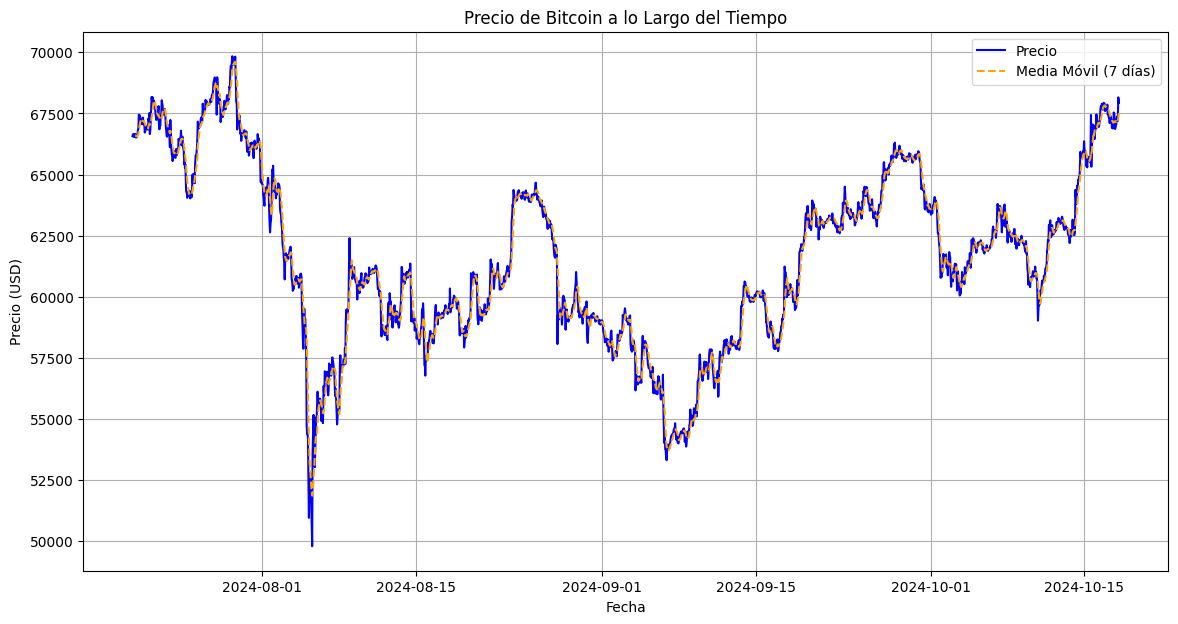

In [74]:
# Visualizar el precio a lo largo del tiempo y la media móvil
plt.figure(figsize=(14, 7))
plt.plot(df['timestamp'], df['price'], label='Precio', color='blue')
plt.plot(df['timestamp'], df['moving_average_7'], label='Media Móvil (7 días)', color='orange', linestyle='--')
plt.title('Precio de Bitcoin a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.grid()
plt.show()

Analizando los Valles de Precio

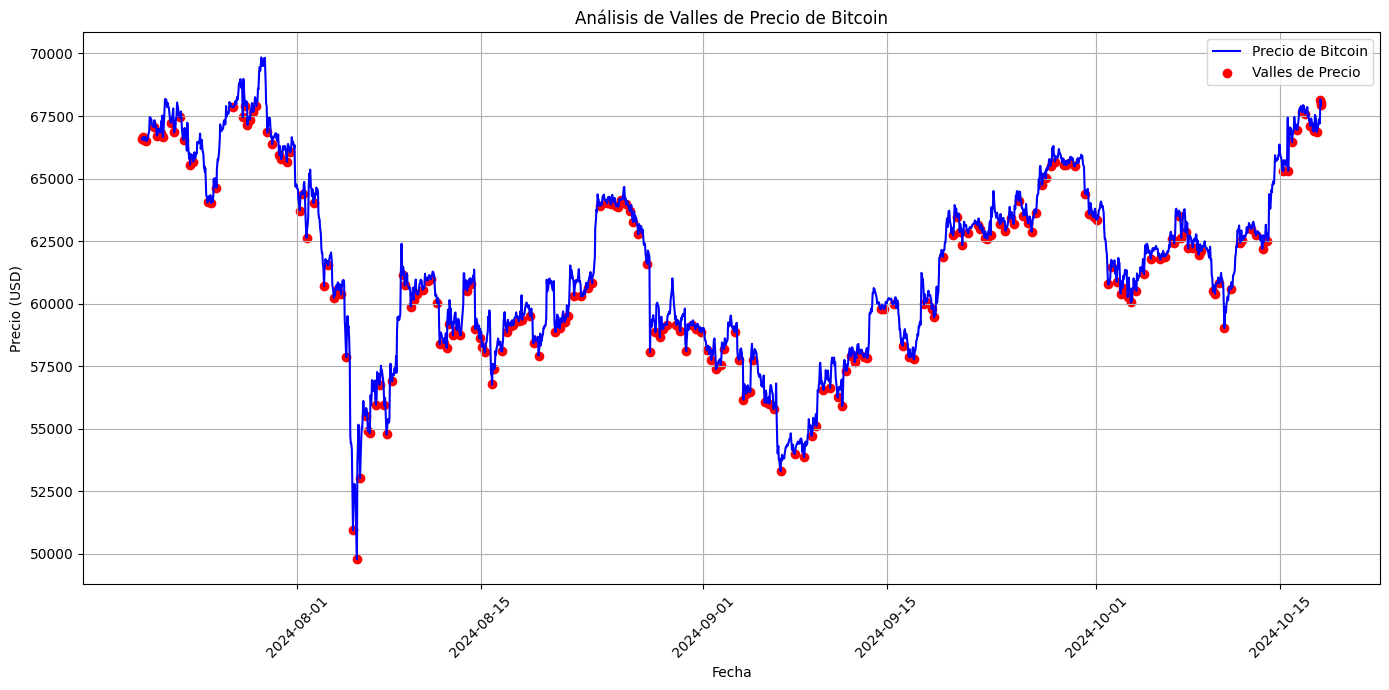

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

# Cargar los datos desde el archivo CSV existente
data = pd.read_csv('../data/processed/enriched_crypto_data.csv', parse_dates=['timestamp'])

# Asegurarse de que los datos estén ordenados por fecha
data.sort_values('timestamp', inplace=True)

# Identificar los valles (mínimos locales)
data['valley'] = data['price'].rolling(window=7, center=True).apply(lambda x: x.argmin() == 3, raw=False)  # Cambiar 3 al centro de la ventana
data['valley'] = data['valley'].astype(bool)  # Convertir a booleano

# Filtrar solo los valles
valleys = data[data['valley']]

# Crear el gráfico
plt.figure(figsize=(14, 7))
plt.plot(data['timestamp'], data['price'], label='Precio de Bitcoin', color='blue')
plt.scatter(valleys['timestamp'], valleys['price'], color='red', label='Valles de Precio', marker='o')
plt.title('Análisis de Valles de Precio de Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()

# Guardar el gráfico
plt.savefig('../outputs/graphs/valleys_price_analysis.png')

# Exportar los valles a un CSV
valleys.to_csv('../data/processed/bitcoin_valleys.csv', index=False)

# Mostrar el gráfico
plt.show()


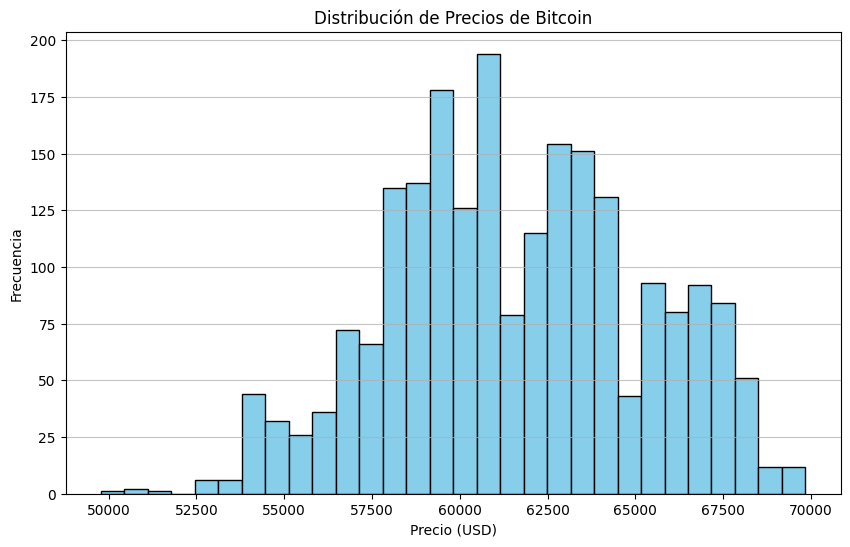

In [76]:
import matplotlib.pyplot as plt
import os

# Crear el directorio de salida si no existe
output_dir = 'outputs/graphs'
os.makedirs(output_dir, exist_ok=True)

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Precios de Bitcoin')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)

# Guardar el gráfico como un archivo PNG en la carpeta correcta
plt.savefig(os.path.join(output_dir, 'histograma_precios_bitcoin.png'))  # Guarda el gráfico
plt.show()
